# Bank Customers Survey - Marketing for Term Deposit


__Classifying whether or not a customer opted for term deposit__


https://www.kaggle.com/sharanmk/bank-marketing-term-deposit

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## Carregando Dataset

In [2]:
# Listar conteudo do diretorio [dataset]
!ls ~/library/dataset

df = pd.read_csv('~/library/dataset/bank_customer_survey.csv')
df.dataframeName = 'bank_customer_survey.csv'
df.head()

bank_customer_survey.csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


## Dicionário de dados

| CAMPO 		| DESCRICAO DO CAMPO																					| TIPO DE CAMPO	| TIPO ESTATISTICO		|
|---------------|-------------------------------------------------------------------------------------------------------|---------------|-----------------------|
|age			|idade																									|int			|Quantitativo Discreto	|
|job			|tipo de trabalho																						|string			|Quantitativo Nonimal	|
|marital		|estado civil																							|string			|Qualitativo Nonimal	|
|education		|nível de escolaridade do cliente																		|string			|Qualitativo Nonimal	|
|default		|tem crédito por padrão?																				|bool			|Qualitativo Nonimal	|
|balance		|saldo médio anual, em euros																			|int			|Quantitativo Discreto	|
|housing		|tem empréstimo habitacional?																			|bool			|Qualitativo Nonimal	|
|loan			|tem empréstimo pessoal?																				|bool			|Qualitativo Nonimal	|
|contact		|tipo de comunicação de contato																			|string			|Qualitativo Nonimal	|
|day			|último dia de contato do mês																			|int			|Qualitativo Nonimal	|
|month			|último contato mês do ano																				|string			|Qualitativo Nonimal	|
|duration		|última duração de contato, em segundos																	|int			|Quantitativo Discreto	|
|campaign		|número de contatos realizados durante esta campanha e para este cliente								|int			|Quantitativo Discreto	|
|pdays			|número de dias que passaram depois que o cliente foi contatado pela última vez de uma campanha anterior|int			|Quantitativo Discreto	|
|previous		|número de contatos realizados antes desta campanha e para este cliente									|int			|Quantitativo Discreto	|
|poutcome		|resultado da campanha de marketing anterior															|string			|Qualitativo Nonimal	|
|y				|o cliente assinou um termo depósito? 																	|bool			|Qualitativo Nonimal	|

## Detalhamento Geral do dataframe

In [3]:
# Detalhamento do dataframe
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [4]:
# Correlação dos dados
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


In [5]:
# Correlação dos dados --> Visualização com cores
df.corr().style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,balance,day,duration,campaign,pdays,previous,y
age,1.0,0.098,-0.0091,-0.0046,0.0048,-0.024,0.0013,0.025
balance,0.098,1.0,0.0045,0.022,-0.015,0.0034,0.017,0.053
day,-0.0091,0.0045,1.0,-0.03,0.16,-0.093,-0.052,-0.028
duration,-0.0046,0.022,-0.03,1.0,-0.085,-0.0016,0.0012,0.39
campaign,0.0048,-0.015,0.16,-0.085,1.0,-0.089,-0.033,-0.073
pdays,-0.024,0.0034,-0.093,-0.0016,-0.089,1.0,0.45,0.1
previous,0.0013,0.017,-0.052,0.0012,-0.033,0.45,1.0,0.093
y,0.025,0.053,-0.028,0.39,-0.073,0.1,0.093,1.0


## Machine Learning

### Tratando os dados

#### Convertendo os dados

```
Para padronizar a conversão de dados, criarei novas colunas com o prefixo C_ Ex: C_nomecoluna
```

In [6]:
#Agrupando e contando os tipos de trabalho
x = df.job.value_counts().to_frame().reset_index()
x.columns = ['x', 'total']
x

,x,total
0,blue,9732
1,management,9458
2,technician,7597
3,admin,5171
4,services,4154
5,retired,2264
6,self,1579
7,entrepreneur,1487
8,unemployed,1303
9,housemaid,1240


In [7]:
c_job = {
    'blue': 0 
    ,'management': 1 
    ,'technician': 2 
    ,'admin': 3 
    ,'services': 4 
    ,'retired': 5 
    ,'self': 6 
    ,'entrepreneur': 7 
    ,'unemployed': 8 
    ,'housemaid': 9 
    ,'student': 10
    ,'unknown': 11
}
df['C_job'] = df.job.map(c_job)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,C_job
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,7
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,11


In [8]:
x = df.marital.value_counts().to_frame().reset_index()
x.columns = ['x', 'total']
x

,x,total
0,married,27214
1,single,12790
2,divorced,5207


In [9]:
r_marital = {
    'married': 0,
    'single': 1,
    'divorced': 2
}
df['C_marital'] = df.marital.map(r_marital)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,C_job,C_marital
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,2,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,7,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,11,1


In [10]:
x = df.education.value_counts().to_frame().reset_index()
x.columns = ['x', 'total']
x

,x,total
0,secondary,23202
1,tertiary,13301
2,primary,6851
3,unknown,1857


In [11]:
r_ed = {
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}
df['C_education'] = df.education.map(r_ed)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,C_job,C_marital,C_education
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,1,0,3
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,2,1,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,7,0,2
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,11,1,0


In [12]:
x = df.default.value_counts().to_frame().reset_index()
x.columns = ['x', 'total']
x

,x,total
0,no,44396
1,yes,815


In [13]:
r_def = {
    'no': 0,
    'yes': 1
}
df['C_default'] = df.default.map(r_def)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,C_job,C_marital,C_education,C_default
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,0,1,0,3,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,0,2,1,2,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,0,7,0,2,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,0,11,1,0,0


In [14]:
x = df.housing.value_counts().to_frame().reset_index()
x.columns = ['x', 'total']
x

,x,total
0,yes,25130
1,no,20081


In [15]:
r_def = {
    'no': 0,
    'yes': 1
}
df['C_housing'] = df.housing.map(r_def)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,C_job,C_marital,C_education,C_default,C_housing
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,0,1,0,3,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,0,2,1,2,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,0,7,0,2,0,1
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,0,11,1,0,0,0


In [16]:
x = df.loan.value_counts().to_frame().reset_index()
x.columns = ['x', 'total']
x

,x,total
0,no,37967
1,yes,7244


In [17]:
r_def = {
    'no': 0,
    'yes': 1
}
df['C_loan'] = df.loan.map(r_def)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,C_job,C_marital,C_education,C_default,C_housing,C_loan
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,0,1,0,3,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,0,2,1,2,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,0,7,0,2,0,1,1
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,0,11,1,0,0,0,0


In [18]:
x = df.month.value_counts().to_frame().reset_index()
x.columns = ['x', 'total']
x

,x,total
0,may,13766
1,jul,6895
2,aug,6247
3,jun,5341
4,nov,3970
5,apr,2932
6,feb,2649
7,jan,1403
8,oct,738
9,sep,579


In [19]:
c_month = {
    'may': 0 
    ,'jul': 1 
    ,'aug': 2 
    ,'jun': 3 
    ,'nov': 4 
    ,'apr': 5 
    ,'feb': 6 
    ,'jan': 7 
    ,'oct': 8 
    ,'sep': 9 
    ,'mar': 10
    ,'dec': 11
}
df['C_month'] = df.month.map(c_month)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,C_job,C_marital,C_education,C_default,C_housing,C_loan,C_month
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,unknown,0,1,0,3,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,unknown,0,2,1,2,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,unknown,0,7,0,2,0,1,1,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,...,0,unknown,0,0,0,0,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,unknown,0,11,1,0,0,0,0,0


### Separando os dados para o treinamento

In [20]:
x = df[['age', 'C_job', 'C_marital', 'C_default', 'balance', 'C_housing', 'C_loan', 'day', 'C_month', 'duration', 'campaign', 'pdays', 'previous']]
x.head()

,age,C_job,C_marital,C_default,balance,C_housing,C_loan,day,C_month,duration,campaign,pdays,previous
0,58,1,0,0,2143,1,0,5,0,261,1,-1,0
1,44,2,1,0,29,1,0,5,0,151,1,-1,0
2,33,7,0,0,2,1,1,5,0,76,1,-1,0
3,47,0,0,0,1506,1,0,5,0,92,1,-1,0
4,33,11,1,0,1,0,0,5,0,198,1,-1,0


In [21]:
y = df['y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### Linear SVC

In [22]:
from sklearn.svm import LinearSVC

SEED = 5
np.random.seed(SEED)

# separando os dados de treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25, 
                                                        stratify = y)
print("TREINO com %d elementos e TESTE com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

TREINO com 33908 elementos e TESTE com 11303 elementos
A acurácia foi 88.43%


### SVC

In [23]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("TREINO com %d elementos e TESTE com %d elementos" % (len(treino_x), len(teste_x)))

# Reescalando os dados para otimizar a acuricidade do algoritmo
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x) 

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

TREINO com 33908 elementos e TESTE com 11303 elementos
A acurácia foi 89.60%


### Árvore de Decisão

In [24]:
from sklearn.tree import DecisionTreeClassifier

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                                test_size = 0.25, 
                                                                stratify = y)
print("TREINO com %d elementos e TESTE com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3) # max_depth = profundidade da arvore --> max_depth=3
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

TREINO com 33908 elementos e TESTE com 11303 elementos
A acurácia foi 89.35%


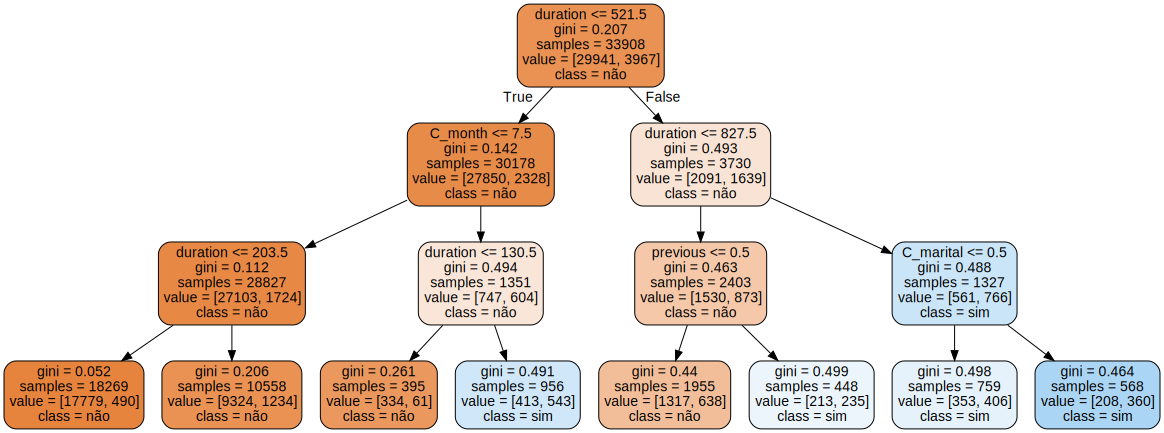

In [25]:
# Visualização da arvore de decisão
# Trecho comentado, por não ser compativel com o extrator de PDF.

from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, 
                           out_file=None, 
                           feature_names=features, # labels
                           filled = True, # cores
                           rounded=True, # arredondamento
                           class_names = ['não', 'sim']
                           ) 
grafico = graphviz.Source(dot_data)
grafico

### SVM (Support Vector Machines)

In [26]:
from sklearn import svm

SEED = 5

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED,
                                                        test_size = 0.2, 
                                                        stratify = y)

print("TREINO com %d elementos e TESTE com %d elementos" % (len(treino_x), len(teste_x)))

modelo = svm.SVC(random_state=SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia de %.2f%%" % acuracia)

TREINO com 36168 elementos e TESTE com 9043 elementos
A acurácia de 88.30%


### Gaussian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

SEED = 5

# separando os dados de treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED,
                                                        test_size = 0.2, 
                                                        stratify = y)

print("TREINO com %d elementos e TESTE com %d elementos" % (len(treino_x), len(teste_x)))

modelo = GaussianNB()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia de %.2f%%" % acuracia)

TREINO com 36168 elementos e TESTE com 9043 elementos
A acurácia de 86.97%


### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

SEED = 5

# separando os dados de treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED,
                                                        test_size = 0.2, 
                                                        stratify = y)

print("TREINO com %d elementos e TESTE com %d elementos" % (len(treino_x), len(teste_x)))

modelo = RandomForestClassifier()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia de %.2f%%" % acuracia)

TREINO com 36168 elementos e TESTE com 9043 elementos
A acurácia de 90.01%


## Conclusão

```
A melhor taxa de acurácia foi obtido através do algoritmo random forest classifier com 90.01% 
de acurácia, porem com o algoritmo SVC obtive a acurácia de 89.60% com a otimização de escala.
```